In [45]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [47]:
# Show the first training example
print(f"Training sample: \n{train_data[0]}\n")
print(f"Training Label: {train_labels[0]}")

Training sample: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [48]:
# Check the shape of our data
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [49]:
# Check shape of single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

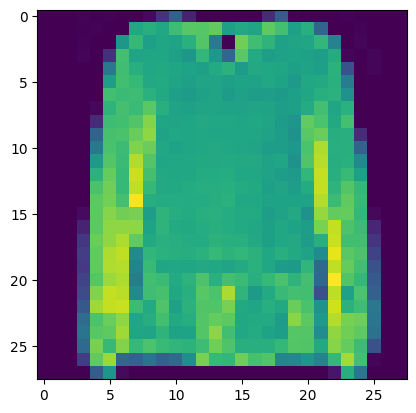

In [50]:
# Ok, 60,000 training each with shape (28,28) and a label each as well as 10,000 test examples of shape (28,28).

# But these are just numbers, let's visualize

# Plot a single example
plt.imshow(train_data[18])

In [51]:
# Check our sample's label
train_labels[18]

6

In [52]:
# It looks like our labels are in numerical form. And while this is fine for a neural network, 
# you might want to have them in human readable form.

# Let's create a small list of class names

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [53]:
# How many classes are there
len(class_names)

10

Text(0.5, 1.0, 'Dress')

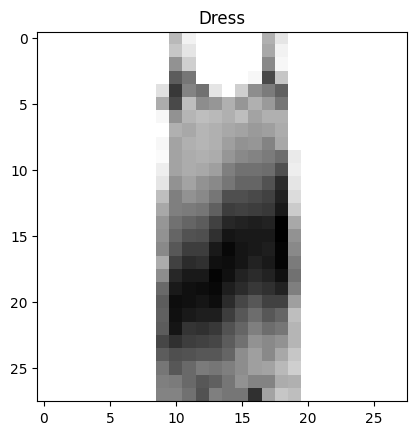

In [54]:
# Let's plot an another example
plt.imshow(train_data[91], cmap=plt.cm.binary) # Change the color to black and white
plt.title(class_names[train_labels[91]])

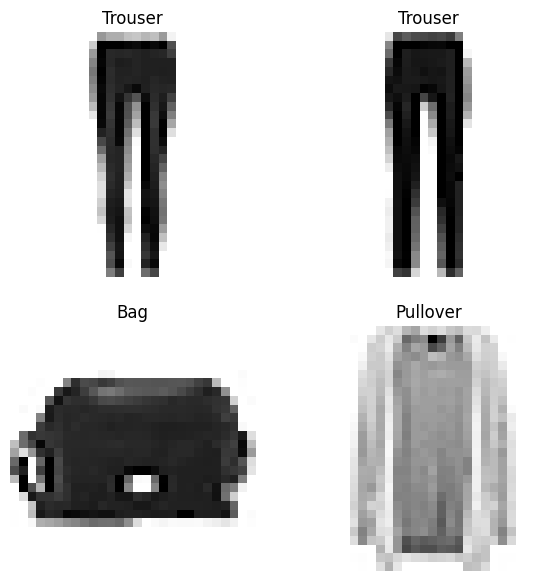

In [55]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7,7))
for i in range(4):
    ax = plt.subplot(2,2,i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

In [56]:
# Lets Build a model

# Set random seed
tf.random.set_seed(42)
 
# 1. Create a model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # Input layer, we had to reshape 28,28 to 784
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax") # Output shape shape is 10, activation is softmax
])

# 2. Compile the model 
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

# 3. Fit the model
history = model.fit(train_data, train_labels, epochs=20, validation_data=(test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3844 - accuracy: 0.0981 - val_loss: 2.3036 - val_accuracy: 0.1000
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3028 - accuracy: 0.0984 - val_loss: 2.3028 - val_accuracy: 0.1001
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 1.8855 - accuracy: 0.2420 - val_loss: 1.6568 - val_accuracy: 0.2678
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 1.4982 - accuracy: 0.3289 - val_loss: 1.4509 - val_accuracy: 0.3471
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 1.4271 - accuracy: 0.3544 - val_loss: 1.3902 - val_accuracy: 0.3860
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 1.3545 - accuracy: 0.3958 - val_loss: 1.3472 - val_accuracy: 0.3869
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 1.3325 - accuracy: 0.4010 - val_loss: 1.3292 - val_accuracy:

In [57]:
# Let's create a confusion matrix function 
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), text_size=15):
    
    # Create the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    n_classes = cm.shape[0] # Find the number of classes wwe are dealing with
    
    # Plot the figure and make it pretty
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)
    
    # Are there a list of classes?
    if classes:
        labels=classes
    else:
        labels=np.arange(cm.shape[0])
        
    # Label the axes
    ax.set(title="Confusion Matrix",
           xlabel="Predicted Label",
           ylabel="True Label",
           xticks=np.arange(n_classes), # Create enough axis slots for each class
           yticks=np.arange(n_classes),
           xticklabels=labels, # Axes will be labelled with class names 
           yticklabels=labels)
    
    # Make x-axis labels appear on bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()
    
    # Set the threshold for different colors
    threshold = (cm.max() + cm.min()) / 2
    
    # Plot the text on each cell
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
                 horizontalalignment="center",
                 color="white" if cm[i,j] > threshold else "black",
                 size=text_size)

Since a confusion matrix compares truth_labels(test_labels) to the predicted labels, we have to make some predictions with our model.

In [58]:
# Make predictions with the most recent model
y_probs = model.predict(test_data)

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 0s 813us/step


array([[1.2059045e-04, 1.1655829e-08, 2.4704813e-04, 5.6691110e-06,
        7.3588715e-05, 3.2588407e-01, 5.3944963e-04, 3.2665324e-01,
        2.7691428e-02, 3.1878492e-01],
       [2.1643040e-01, 1.2825473e-03, 2.2152507e-01, 7.0959009e-02,
        1.7917675e-01, 3.1604764e-14, 2.7811396e-01, 2.1416431e-23,
        3.2512318e-02, 8.0851331e-22],
       [2.0610716e-05, 9.8763740e-01, 1.4441077e-06, 1.2284935e-02,
        5.5457145e-05, 0.0000000e+00, 2.1355588e-07, 0.0000000e+00,
        1.5322676e-18, 0.0000000e+00],
       [3.3477580e-05, 9.8403221e-01, 2.5470913e-06, 1.5844539e-02,
        8.6873995e-05, 0.0000000e+00, 4.0225191e-07, 0.0000000e+00,
        5.9442299e-18, 0.0000000e+00],
       [2.0326765e-01, 8.1696501e-04, 2.2212687e-01, 5.5486877e-02,
        1.6350697e-01, 1.0163021e-12, 2.9381600e-01, 5.0470518e-21,
        6.0978636e-02, 1.3496627e-19]], dtype=float32)

Our model outputs a list of prediction probabilities, meaning, it outputs a number for how likely it thinks a particular class is to be the label

The higher the number in the prediction probabilities list, the more likely the model believes that is the right class.

To find the highest value we can use the argmax() method.

In [59]:
# See the predicted class number and label for the first class example
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(7, 'Sneaker')

Now let's do the same for all of the predictions

In [60]:
# Convert all tghe predictions from probabilities to labels 
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([7, 6, 1, 1, 6, 1, 6, 6, 5, 7], dtype=int64)

Wonderful, now we have got our model's predictions in the label form, let's create a confusion matrix to view them against the truth labels.

In [61]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[306,   5,   0, 352,   0,   2, 268,   6,  61,   0],
       [  5, 878,   0,  97,   0,   1,  13,   0,   6,   0],
       [307,   0,   0, 150,   0,   2, 450,   2,  89,   0],
       [130, 140,   0, 584,   0,   0, 116,   3,  27,   0],
       [296,   3,   0, 322,   0,   1, 321,   1,  56,   0],
       [  0,   0,   0,   0,   0,  70,   0, 909,  21,   0],
       [235,   4,   0, 142,   0,   4, 440,   8, 167,   0],
       [  0,   0,   0,   0,   0,   8,   0, 988,   4,   0],
       [ 12,   0,   0,   7,   0,  47,  71,  33, 830,   0],
       [  0,   0,   0,   0,   0,   2,   0, 995,   3,   0]], dtype=int64)

That mix of confusion matrix is hard to comprehend, let's make it prettier using the function we created before.

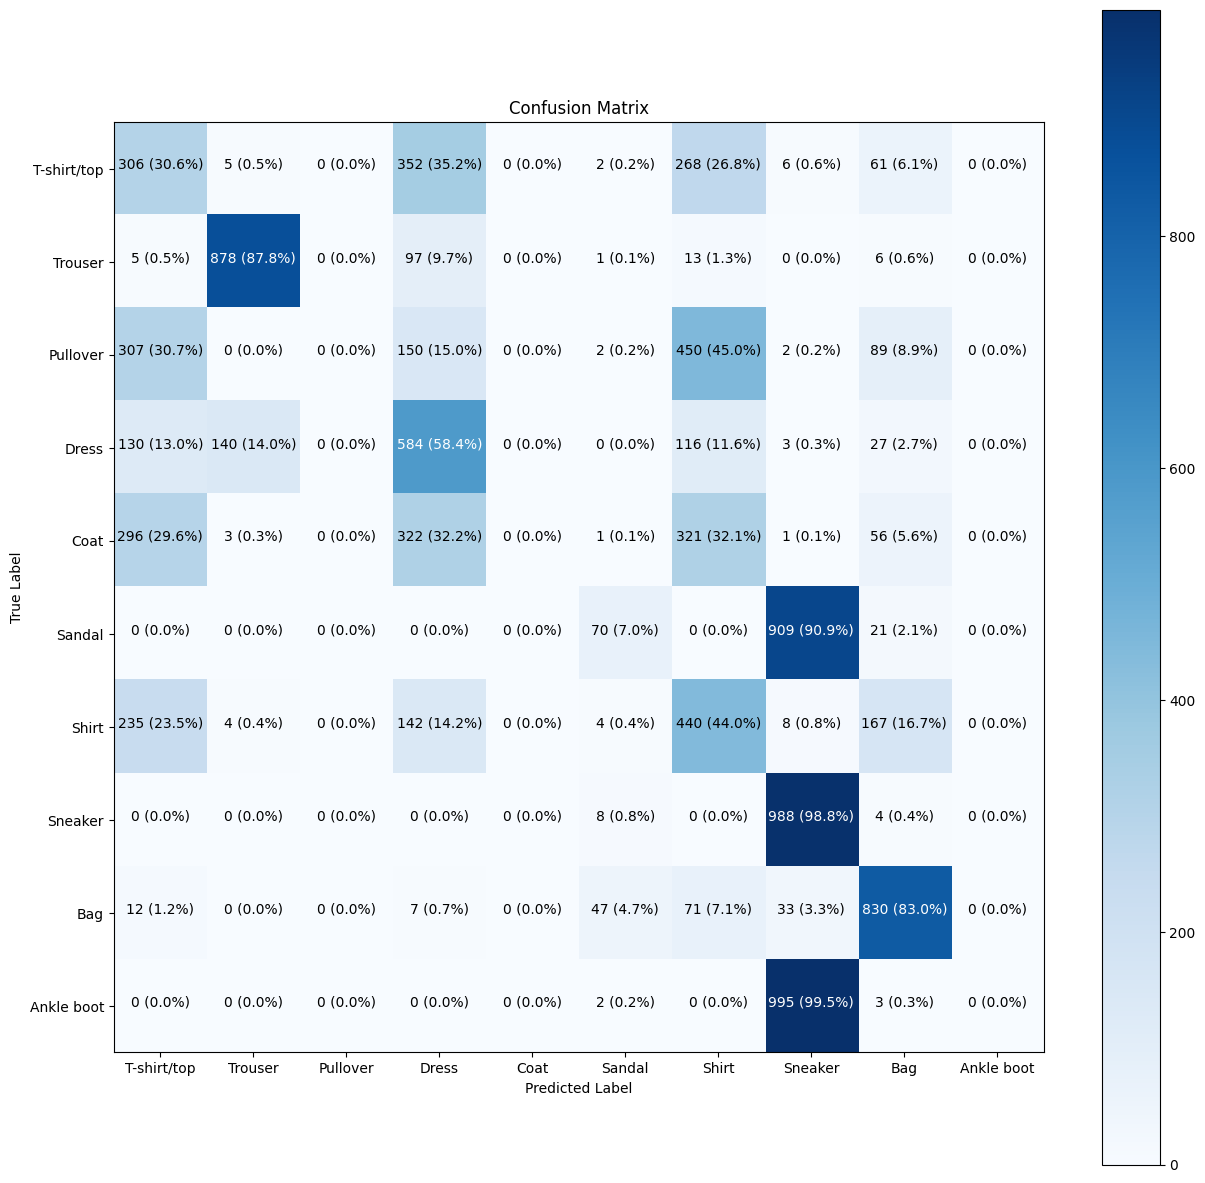

In [62]:
# Make a prettier Confusion Matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15,15),
                      text_size=10)